In [11]:
!pip install seaborn matplotlib numpy pandas


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
!pip install scikit-learn

In [14]:
from sklearn.utils import resample
# using this for unbalanced data

In [15]:
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score #gridsearch is brute force and best for smaller dataset (best it makes many combination , while randomSearchCv uses random)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score

In [18]:
import pickle

In [19]:
data = pd.read_csv("Rainfall.csv")


In [20]:
data.shape

(366, 12)

In [21]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [22]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [24]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [25]:
#removing extra spaces
data.columns=data.columns.str.strip()

In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [27]:
data.drop(["day"], axis=1 , inplace=True)

In [28]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [29]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [30]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [31]:
#handle windirection nan with mode
data["winddirection"]= data["winddirection"].fillna(data["winddirection"].mode()[0])

In [32]:
data["windspeed"].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [33]:
data["windspeed"]= data["windspeed"].fillna(data["windspeed"].median())

In [34]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [35]:
data["rainfall"]=data["rainfall"].map({"yes":1,"no":0})
data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [36]:
sns.set(style="whitegrid")

In [37]:
data.describe()
#checking mean and 50%

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [38]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

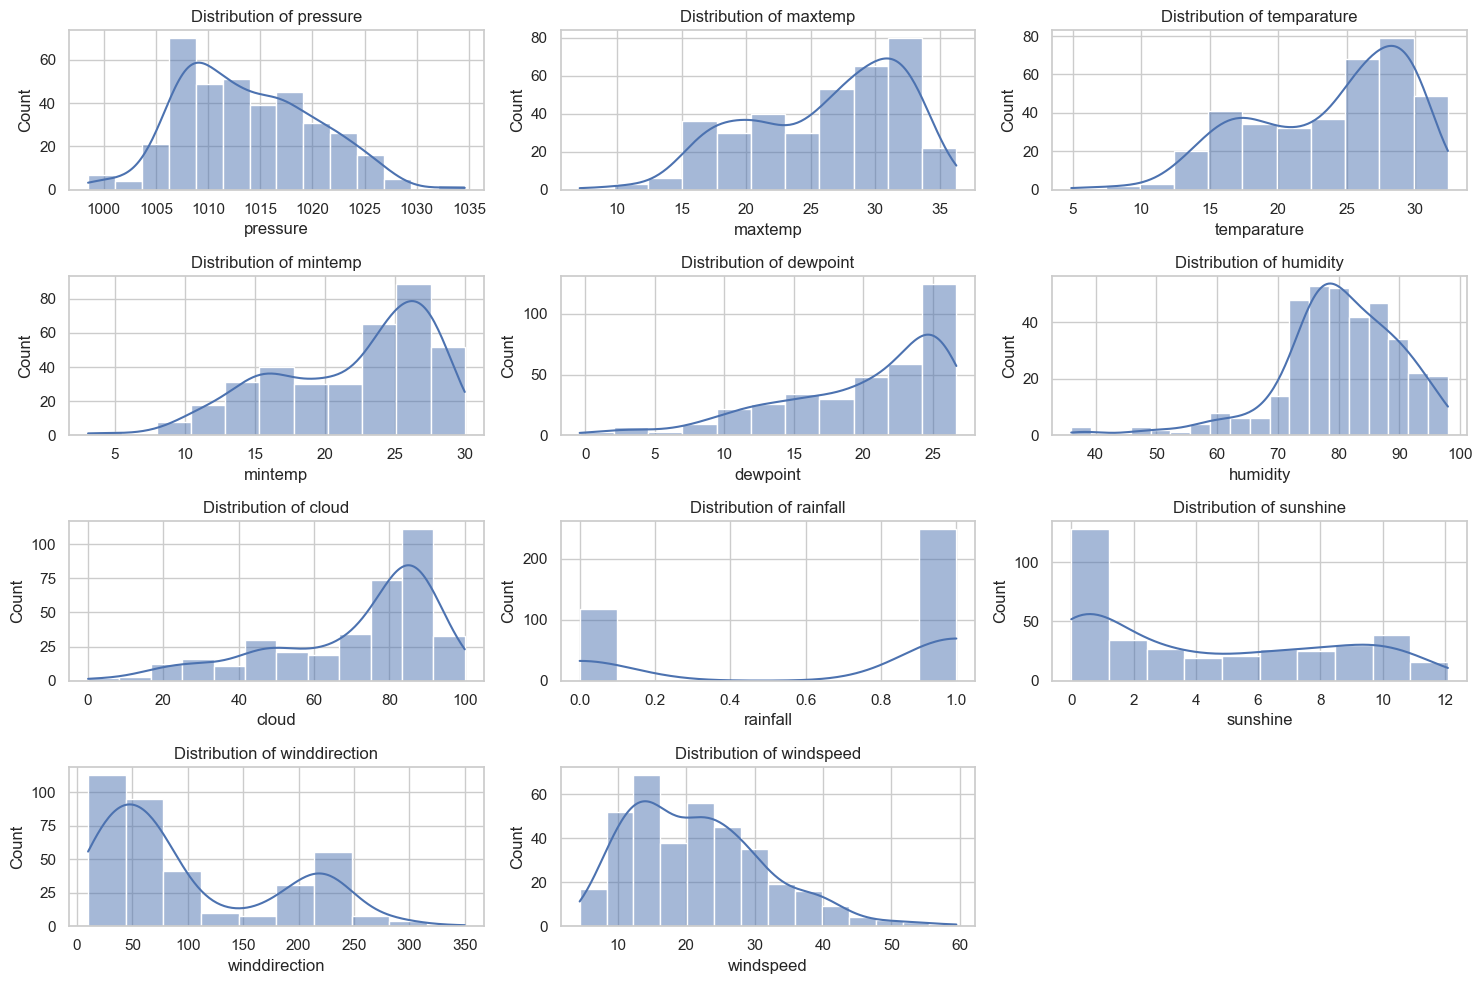

In [39]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],1):
  plt.subplot(4,3,i)
  sns.histplot(data[column],kde=True )
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

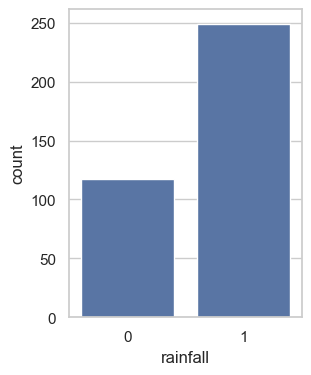

In [40]:
#distribution imbalance
plt.figure(figsize=(3,4))
sns.countplot(x="rainfall",data=data)
plt.show()

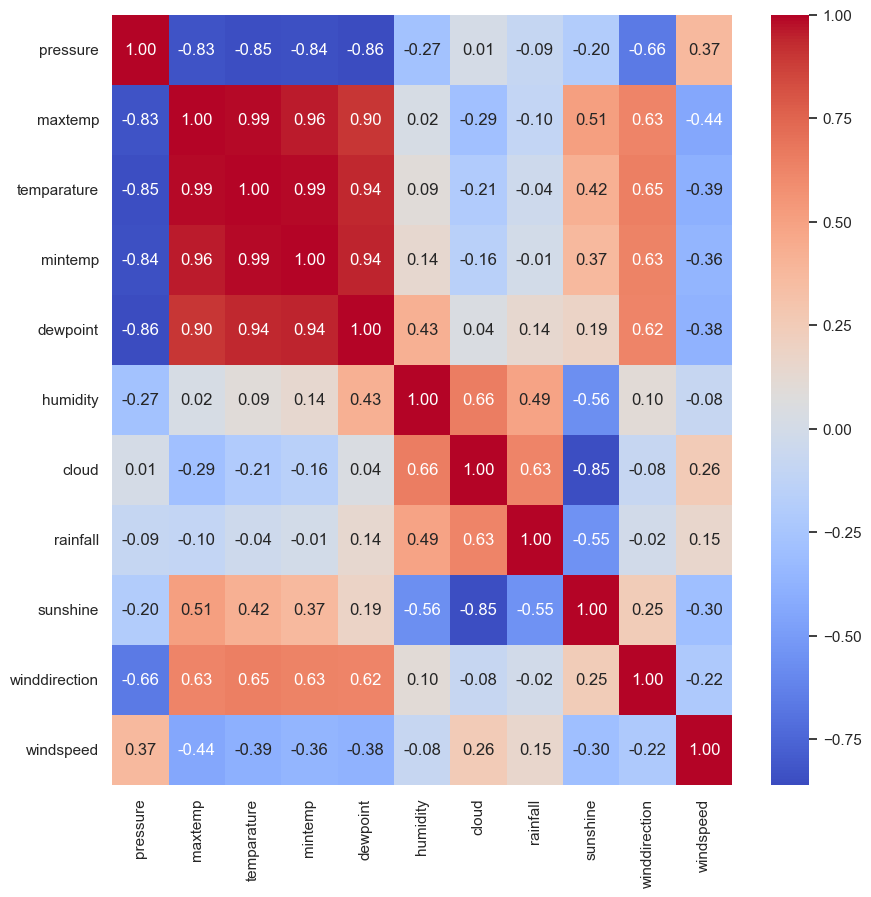

In [41]:
#multiple correlation so that we can igore values that are not imp
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title=("correlation of heatmap")
plt.show()

In [42]:
data.drop(columns=["maxtemp","temparature","mintemp"])

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,13.3,78,86,1,1.2,20.0,20.9


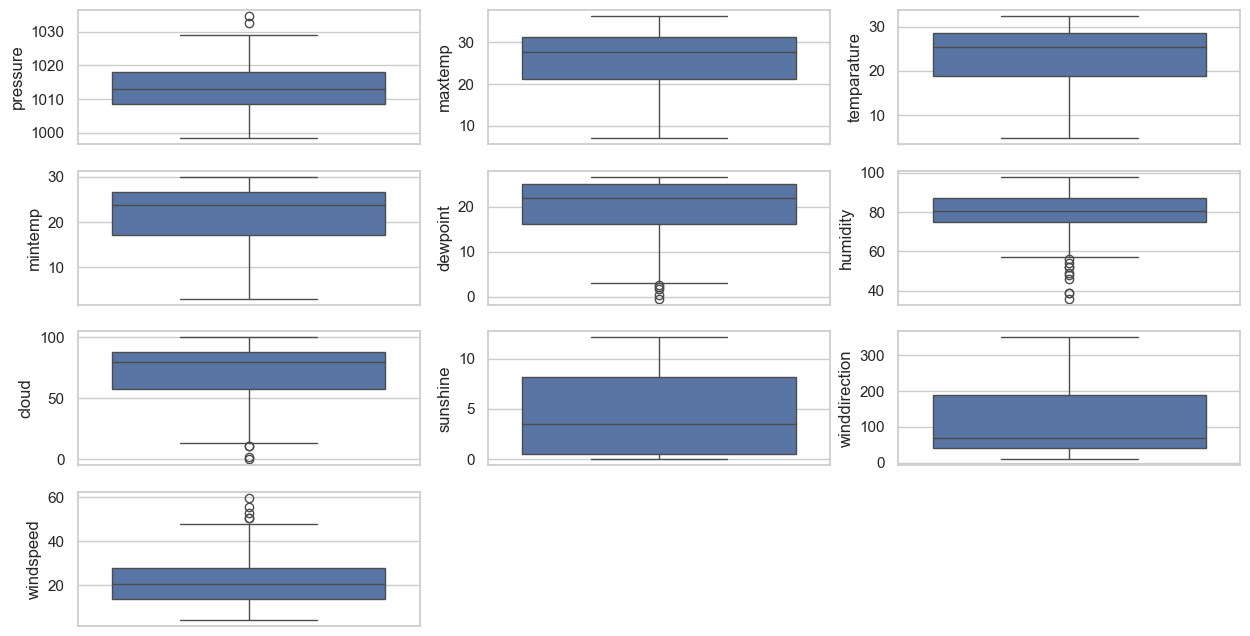

In [43]:
plt.figure(figsize=(15,8))
for i, column in enumerate(['pressure','maxtemp','temparature','mintemp',
                       'dewpoint','humidity','cloud','sunshine',
                       'winddirection','windspeed'],1):
  plt.subplot(4,3,i)
  sns.boxplot(data[column])
  plt.xticks(rotation=45)
plt.show()


In [44]:
#for continous weather wwe use z score instead of iqr because weather range is too dofferent
#for skewed value in windspeed ,sunshine we use percentile methos

In [45]:
#downshampling for 1 and 0 for best distribution
from sklearn.utils import resample

maj = data[data.rainfall == 1]
min = data[data.rainfall == 0]

maj_down = resample(maj, replace=False, n_samples=len(min), random_state=42)

data_down = pd.concat([maj_down, min]).sample(frac=1, random_state=42)

data = data_down.copy()

print(data_down['rainfall'].value_counts())

rainfall
1    117
0    117
Name: count, dtype: int64


In [46]:
data["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [47]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
342,1022.2,19.0,18.0,17.0,14.1,78,90,1,0.0,30.0,28.5
290,1013.4,30.8,26.2,23.6,19.5,69,17,0,10.5,70.0,12.4
217,1006.1,33.3,29.6,27.6,24.4,74,27,0,10.8,220.0,8.7
146,1007.6,29.5,27.6,26.7,24.8,85,84,1,1.8,70.0,34.8
35,1021.2,18.6,14.8,12.3,8.4,66,18,0,10.1,20.0,24.4


In [48]:
data.shape

(234, 11)

In [49]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [50]:
data.drop(['maxtemp', 'temparature', 'mintemp'],axis=1, inplace =True)

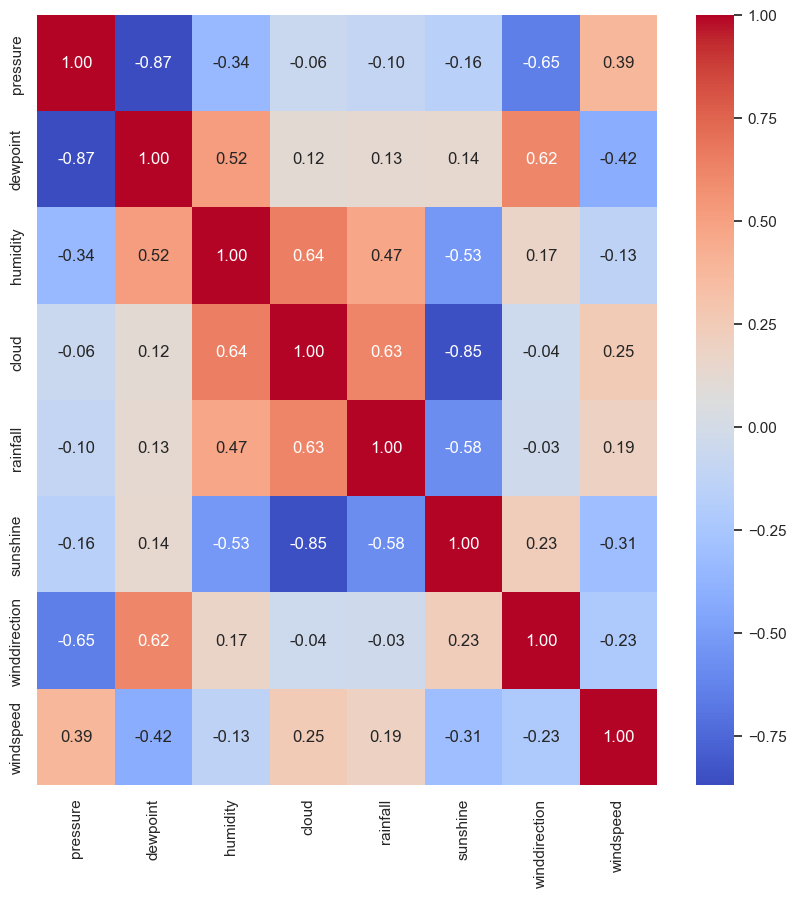

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot =True, cmap="coolwarm",fmt=".2f")
plt.show()

In [52]:
X=data.drop(["rainfall"], axis=1)
Y= data["rainfall"]

In [53]:
X

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
342,1022.2,14.1,78,90,0.0,30.0,28.5
290,1013.4,19.5,69,17,10.5,70.0,12.4
217,1006.1,24.4,74,27,10.8,220.0,8.7
146,1007.6,24.8,85,84,1.8,70.0,34.8
35,1021.2,8.4,66,18,10.1,20.0,24.4
...,...,...,...,...,...,...,...
158,1008.1,25.4,86,75,5.7,20.0,9.5
101,1010.1,19.9,91,89,0.0,70.0,31.8
52,1020.6,14.7,91,88,0.3,50.0,24.4
216,1008.3,24.1,74,29,5.7,10.0,4.4


In [54]:
Y

342    1
290    0
217    0
146    1
35     0
      ..
158    1
101    1
52     1
216    0
194    1
Name: rainfall, Length: 234, dtype: int64

In [55]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:

#hyperparameter
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],  # Changed "sqt" to "sqrt"
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]  # Changed "min_sample_leaf" to "min_samples_leaf"
}


In [57]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, Y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [58]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters of random forest :" , grid_search_rf.best_params_)


best parameters of random forest : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


model_evaluation

In [59]:
cv_scores = cross_val_score(best_rf_model,X_train,Y_train,cv=5)
print("cross_validation score:",cv_scores)
print("mean cross_validation score:", np.mean(cv_scores))

cross_validation score: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
mean cross_validation score: 0.818918918918919


In [60]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
print("Test set accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))


Test set accuracy: 0.7446808510638298

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [61]:
import pickle

# Save the trained model
with open('rainfall_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

print("\nModel saved as 'rainfall_model.pkl'")

# If you used any preprocessing (scaler, encoder, etc.), save those too
# Example:
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# Save feature names for reference in Streamlit
feature_names = X_train.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved as 'feature_names.pkl'")


Model saved as 'rainfall_model.pkl'
Feature names saved as 'feature_names.pkl'
